2.
- a) How about multiple linear regression (from scratch) analysis? Can you predict the phone's rating based on its pixel density, screen size, weight, RAM, processor frequency, screen-to-body ratio, height, internal memory, capacity, and resolution using 80-20 train-test split ratio? (Using gradient descent approach). 
- b) What is the MSE for this model? Also explore R-squared (R2) error.


In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("mobile_data (1).csv")
df=df.fillna(0)
df2=(df-df.min())/(df.max()-df.min())
df2.drop(["Rating"],axis=1)
df2['Rating']=df['Rating']
from sklearn.model_selection import train_test_split
X=df2.iloc[:,1:-1].values
y=df2.iloc[:,-1:].values
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=100)


In [232]:
w=np.zeros([1,X_train.shape[1]])
np.shape(w)


(1, 11)

In [233]:

#computecost
def computeCost(X,y,w):
    tobesummed = np.power(((X @ w.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))
alpha=0.01
n=10000


In [234]:

#gradient descent
def gradientDescent(X,y,w,n,alpha):
    cost = np.zeros(n)
    for i in range(n):
        w = w - (alpha/len(X)) * (np.sum(X* (X @ w.T - y),axis=0))
        cost[i] = computeCost(X, y, w)
        print(cost[i])
    
    return w,cost

#running the gd and cost function
weights,cost = gradientDescent(X_train,y_train,w,n,alpha)
print(weights)
print((1/len(X_train)) * (np.sum(X_train* (X_train @ weights.T - y_train),axis=0)))
finalCost = computeCost(X,y,weights)
print(finalCost)

7.851761307647009
7.3581289230119
6.896304803202621
6.464238770370179
6.060012790018911
5.681832453761117
5.328019011047236
4.99700191448757
4.6873118456622285
4.397574190449614
4.126502934899926
3.8728949545476126
3.6356246718038507
3.41363905770458
3.2059529558188102
3.0116447075524957
2.8298520594216408
2.659768334120433
2.500638848381605
2.3517575617221214
2.2124639411925933
2.0821400282079696
1.9602076944344455
1.8461260745470596
1.7393891644578312
1.6395235743491188
1.5460864265342875
1.4586633888108986
1.376866834573311
1.3003341215144648
1.228725981273234
1.161725012876395
1.0990342732851703
1.040375958787516
0.9854901713807251
0.9341337646663331
0.886079264132389
0.8411138570284901
0.7990384473480047
0.7596667717210245
0.722824572292075
0.6883488229096502
0.6560870051913831
0.6258964312501359
0.5976436100735031
0.5712036547430601
0.5464597278610531
0.5233025227218817
0.5016297779244597
0.48134582327003755
0.46236115492899166
0.4445920379900647
0.4279601346271304
0.412392156232

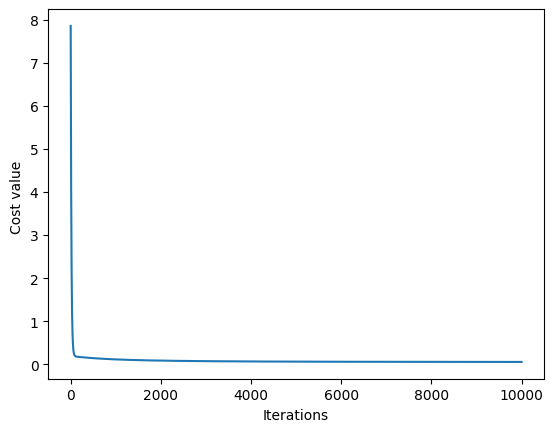

In [235]:
#plot the cost
plt.plot(cost)
plt.xlabel("Iterations")
plt.ylabel("Cost value ")
plt.show()

In [236]:
def predict(X, w):
    return X @ w.T
y_pred = predict(X_test, weights)

def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, y_test)


0.30485615683298595